<a href="https://colab.research.google.com/github/AngeloImon/Aulas-IA/blob/main/Aula_IA_1_Iris_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados - Iris DataSet

## 1. Importar as Bibliotecas

In [147]:
# Manipulação de dados em DataFrames
import pandas as pd
# Operações numéricas e arrays
import numpy as np
# Criação de gráficos
import matplotlib.pyplot as plt
# Visualizações estatísticas
import seaborn as sns
# Configuração do estilo do gráfico para fundo com grade branca
sns.set_style("whitegrid")


## 2. Carregar o DataSet

In [148]:
# Iris DataSet já está disponível no Seaborn em forma de DataFrame
iris = sns.load_dataset('iris')

# Exibir as 5 primeiras linhas do DataFrame - Teste e Verificação
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


##3. Análise Inicial dos dados

### 3.1 Informações Básicas e Estatísticas Descritivas

In [149]:
# Exibir resumo da estrutura do DataFrame
# Mostrar número de entradas, tipos de dados e valores não nulos
iris.info()

# Calcular e exibir estatísticas descritivas
iris.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 3.2 Verifica dados faltantes

In [150]:
# Verifica e conta os valores nulos em cada coluna
print("Valores faltantes por coluna:")
print(iris.isnull().sum())

Valores faltantes por coluna:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


### 3.3 Distribui classes (espécies)

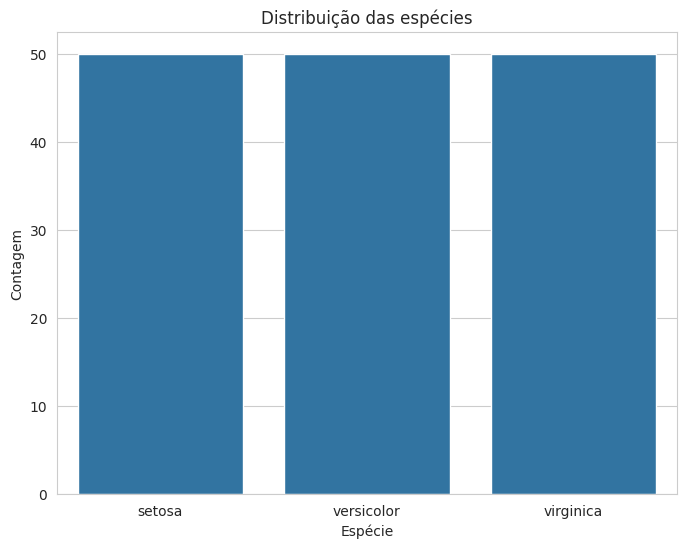

In [151]:
# Vizualização das distribuíções das classes
# Cria gráfico de barras para contagem de amostras de cada espécie
plt.figure(figsize=(8, 6))                # Define o tamanho da figura (Largura x Altura)
sns.countplot(x='species', data=iris)     # Plota a contagem de cada cat na coluna de espécies
plt.title('Distribuição das espécies')    # Título do gráfico
plt.xlabel('Espécie')                     # Define o título do eixo x
plt.ylabel('Contagem')                    # Define o título do eixo y
plt.show()                                # Exibe o gráfico

### 3.4 Exibe elementos por categoria

In [152]:
iris.value_counts("species")

,count
species,
setosa,50
versicolor,50
virginica,50


## 4. Visualizar a distribuição de variáveis

### 4.1 Histograma das variáveis numéricas

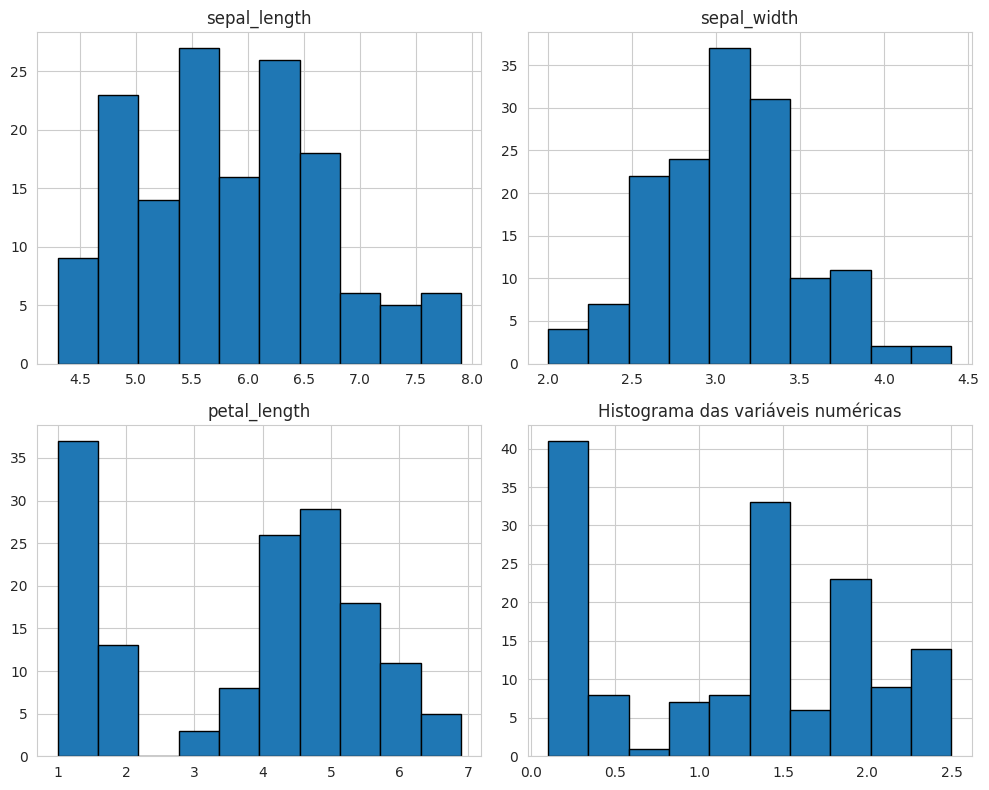

In [153]:
# Histograma: distribuição dos dados para cada variável numéricas
iris.hist(edgecolor = 'black', figsize=(10, 8))
plt.title('Histograma das variáveis numéricas')
plt.tight_layout()
plt.show()

### 4.2 Pairplot de relações entre as variáveis

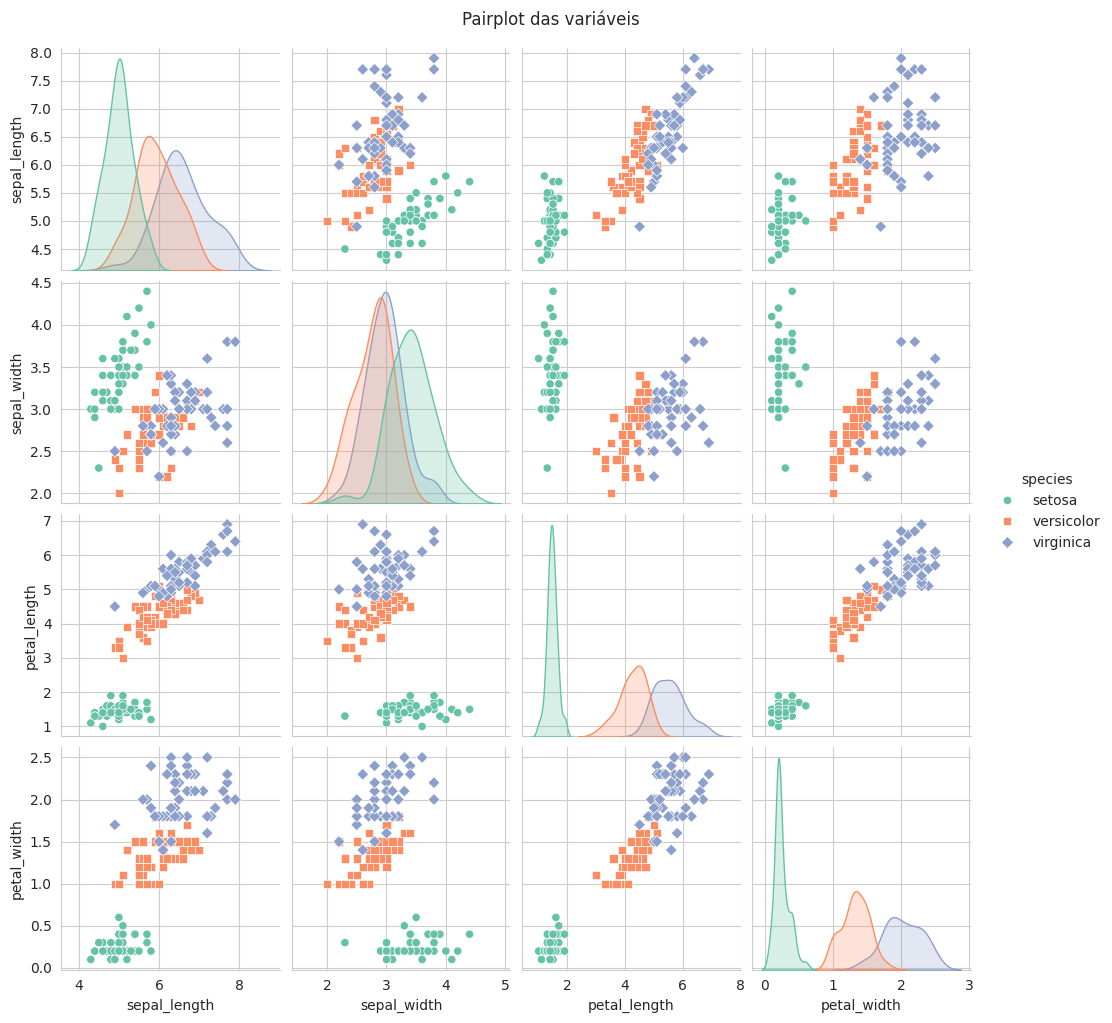

In [154]:
# Conjunto de gráfics para visualizar as relações entre todas as combinações de variáveis
sns.pairplot(iris, hue='species', markers=['o','s','D'], palette='Set2')
plt.suptitle('Pairplot das variáveis', y=1.02)
plt.show()

### 4.3 Boxplot de identificação de outliers e distribuição

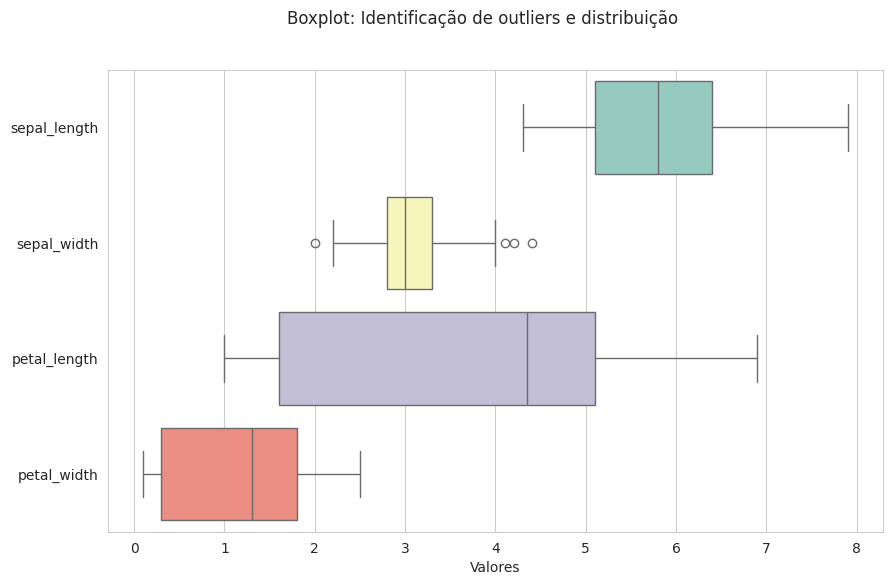

In [155]:
# Resumo da distribuição dos dados, com mediana, quartis e outlier
plt.figure(figsize=(10, 6))                                         # Cria nova figura com tamanho especifíco
sns.boxplot(data=iris, orient='h', palette='Set3')                  # Plota boxplot horizontal para todas variáveis
plt.suptitle ('Boxplot: Identificação de outliers e distribuição')  # Título
plt.xlabel('Valores')                                               # Define título do eixo X
plt.show()

### 4.4 Violinplot para comparar as distribuições por espécies

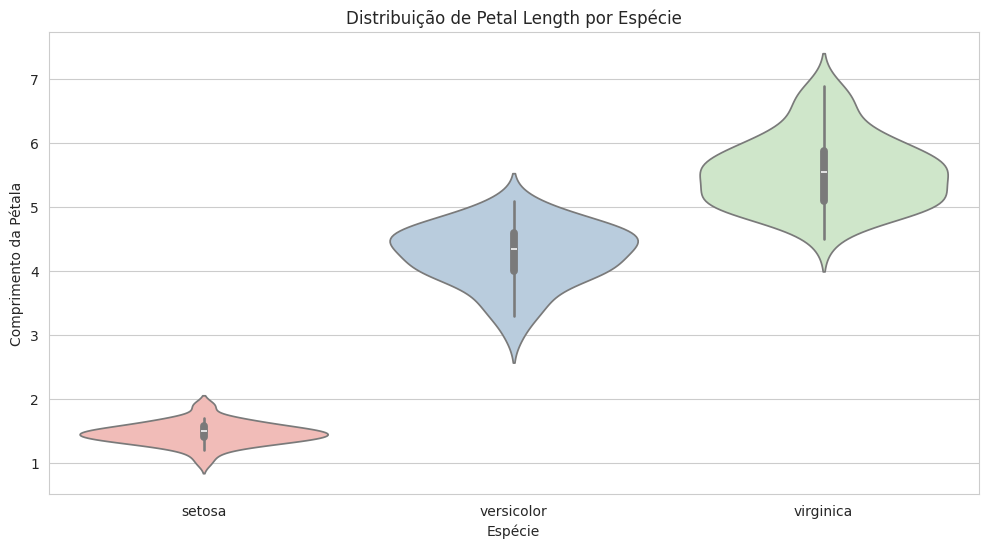

In [156]:
# Combina o boxplot com a estimativada da densidade dos dados
plt.figure(figsize=(12, 6))
sns.violinplot(
    x='species',
    y='petal_length',
    data=iris,
    hue='species',
    palette='Pastel1',
    legend=False
)
plt.title("Distribuição de Petal Length por Espécie")
plt.xlabel("Espécie")
plt.ylabel("Comprimento da Pétala")
plt.show()


### 4.5 Heatmap para mapa de correlação

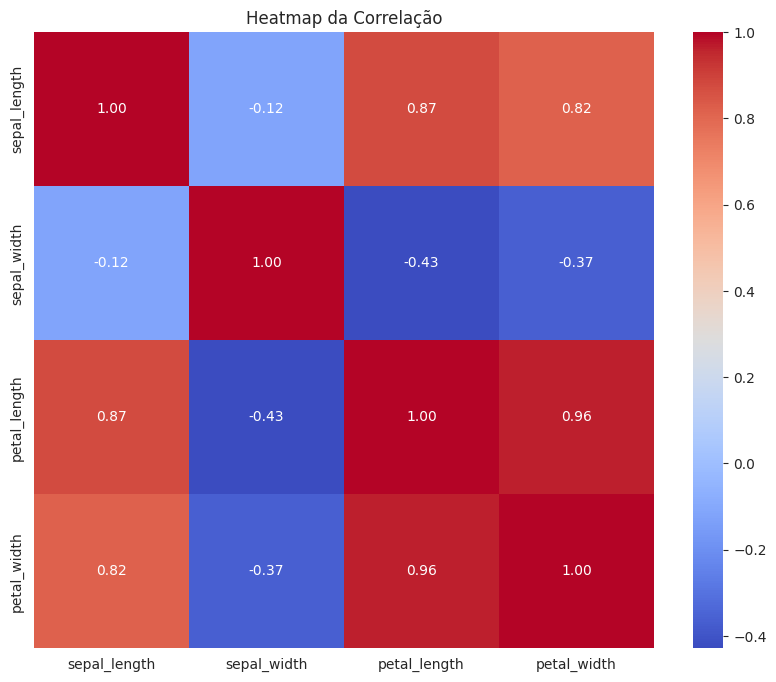

In [157]:
# Calcula a matriz de correlação das variáveis numéricas
correlation_matrix = iris.drop("species", axis=1).corr()

# Cria um mapa de calor (heatmap) para visualizar a correlação entre as variáveis
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# Annot=True adiciona os valores númericos dentro de cada célula
# Cmap='coolwarm' define a paleta de cores para representar as corr positivas e negativas
# fmt=".2f" formata os numéricos para duas casas decimais

plt.title('Heatmap da Correlação')
plt.show()

## 5. Conclusões

Após essas análises, é possível observar:

Estrutura dos Dados: O dataset contém 150 amostras, com 4 variáveis numéricas e uma coluna categórica (species).

Distribuição das Variáveis: Os histogramas e boxplots revelam a variação e a presença (ou ausência) de outliers nas variáveis.

Relações entre Variáveis: O pairplot evidencia as relações e possíveis separações entre as classes, sugerindo quais combinações de variáveis podem ser mais relevantes para a classificação.

Correlação: O heatmap mostra a correlação entre as variáveis, auxiliando na identificação de features redundantes ou altamente correlacionadas.

## 6. Construção de um modelo de predição supervisionado

### 6.1 Scikit-learn

A biblioteca scikit-learn (ou sklearn) é uma das mais populares em Python para machine learning. Ela oferece ferramentas para pré-processamento de dados, seleção e treinamento de modelos, validação e avaliação de desempenho, além de diversas funções para manipulação e transformação dos dados.

In [158]:
# Importar as libs necessárias para a modelagem e avaliação
from sklearn.model_selection import train_test_split # Divisão dos dados entre treino e teste
from sklearn.linear_model import LogisticRegression  # Modelo de regressão logística
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Métricas de avaliação

### 6.2 Pipeline de criação de um modelo de predição

1. Carregar os dados
2. Pré-processamento dos dados
3. Divisão dos dados
4. Escolher um modelo
5. Treinar omodelo
6. Predição
7. Avaliar o modelo
8. Ajustar e melhorar o modelo

In [159]:
x = iris.drop("species", axis=1) # Remover a coluna species para utilizar somente as features
y = iris["species"]              # Coluna species para predição

# Dividir o DataSet em um conjunto de treinamento e teste
# test_size = .3 - define 30% dos dados para teste e 70% para treinamento
# random_state = 42 garante a reprodutibilidade da divisão
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=.3, random_state=42)

x_treino

,sepal_length,sepal_width,petal_length,petal_width
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


### 6.3 Criação e treinamento do modelo de regressão logística

In [160]:
# Criar uma instância do modelo de reg log
# - solver='lbfgs' que é adequado para problemas de classificação multinomial
# - multi_class = 'multinomial' especifica que o problema possui multiplas classes
# - max-iter = 200 número máximo de iterações para convergir "resolver" o problema
model = LogisticRegression(
    solver='lbfgs',
    max_iter=200
)


# Treinar o modelo com os dados de treinamento
model.fit(x_treino, y_treino)

LogisticRegression(max_iter=200)

### 6.4 Predição e Avaliação do modelo

In [161]:
# Realizar predições no conjunto de testes
y_pred = model.predict(x_teste)
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa'], dtype=object)

In [162]:
# Calcular a acurácia do modelo
accuracy = accuracy_score(y_teste, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

Acurácia do modelo: 1.00


In [163]:
# Gerar matriz de confusão para visualizar a performance por classe
conf_matrix = confusion_matrix(y_teste, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [164]:
# Exibir relatório de classificação detalhado, com precisão, recall, f1-score e cada classe
print("Relatório de Classificação:")
print(classification_report(y_teste, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### 6.5 Gráfico para visualização da matriz de confusão

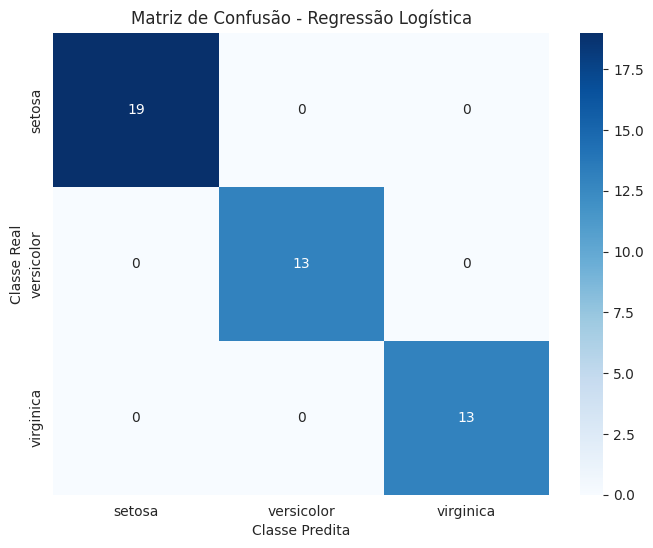

In [165]:
# Criar um gráfico baseado em um mapa de calor para a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Matriz de Confusão - Regressão Logística")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.show()


### 6.6 Testar uma nova flor no preditor

1. Definir as características da nova flor:
Sepal_length (comprimento da sépala)
Sepal_width (largura da sépala)
petal_length (comprimento da pétala)
petal_width (largura da pétala)
2. Criar um array com esses valores.
3. Utilizar o método predict do modelo treinado:
Método irá retornar classe prevista.

In [166]:
# Define o nome das colunas (ordem deve ser igual à usada no treino)
colunas = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Cria o DataFrame com os dados da nova flor
nova_flor = pd.DataFrame([[5.0, 3.4, 1.5, 0.2]], columns=colunas)

# Faz a predição com o modelo
predicao = model.predict(nova_flor)

# Exibe o resultado
print(f"Classe prevista: {predicao[0]}")


Classe prevista: setosa
